In [1]:
# data manipulation 
import numpy as np
import pandas as pd
from numpy.polynomial import polynomial as P # This better fits the growth curve

# plots and graphs
import matplotlib.pyplot as plt

# function fit
from scipy.optimize import curve_fit

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# save output
import os
import csv

# Chapman-Richards Growth Function

In [2]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

###  Gmelina arborea

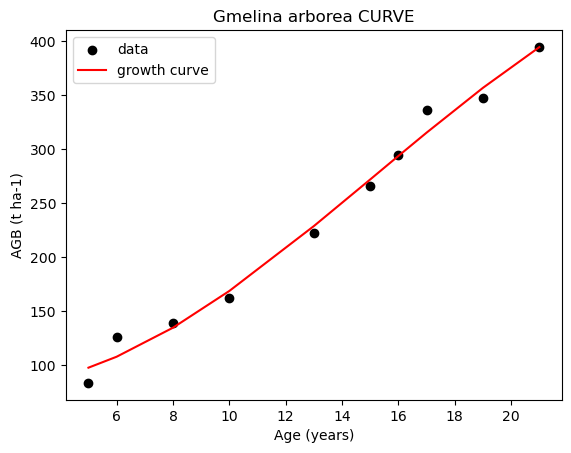

In [3]:
# age
x_data_GA = np.array([5, 6, 8, 10, 13, 15, 16, 17, 19, 21])
# AGB
y_data_GA = np.array([83.2, 125.4, 139.1, 161.6, 222.0, 265.6, 294.2, 336.1, 347.3, 394.9])

# Fit the polynomial of degree 3 to the data
coefs_GA = P.polyfit(x_data_GA, y_data_GA, 3)

# Plot the data and the fitted curve
plt.scatter(x_data_GA, y_data_GA, label='data', marker='o', c='black')
plt.plot(x_data_GA, P.polyval(x_data_GA, coefs_GA), 'b-', label='growth curve', color='red', linewidth=1.5)

plt.title('Gmelina arborea CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (t ha-1)')
plt.legend()
plt.show()

---

### Nauclea diderrichii (de wild)

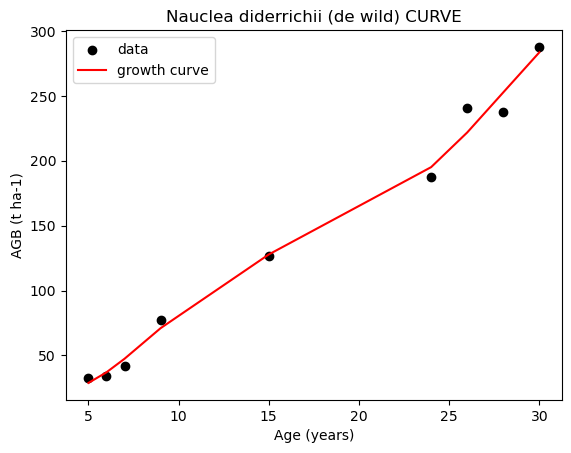

In [4]:
# age
x_data_nu = np.array([5, 6, 7, 9, 15, 24, 26, 28, 30])
# AGB
y_data_nu = np.array([32.48, 33.84, 41.86, 77.50, 126.25, 187.63, 240.62, 237.36, 287.73])

# Fit the polynomial of degree 3 to the data
coefs_nu = P.polyfit(x_data_nu, y_data_nu, 5)

# Plot the data and the fitted curve
plt.scatter(x_data_nu, y_data_nu, label='data', marker='o', c='black')
plt.plot(x_data_nu, P.polyval(x_data_nu, coefs_nu), 'b-', label='growth curve', color='red', linewidth=1.5)

plt.title('Nauclea diderrichii (de wild) CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (t ha-1)')
plt.legend()
plt.show()

### Pinus caribaea

<!-- Estimation of above ground biomass of a Pinus caribaea Morelet
stand in lower Hantana
I.M. Ambagahaduwa 1
, N. Prasad 1
, I.A.U.N. Gunatilleke 2
, G. Seneviratne 3* and C.V.S. Gunatilleke 2 -->

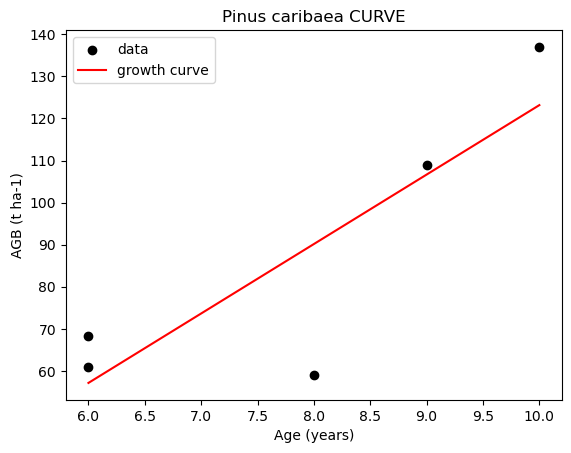

In [7]:
# age
x_data_pc = np.array([10, 9, 8, 6, 6])
# AGB
y_data_pc = np.array([137, 109, 59, 61, 68.3])

# Fit the polynomial of degree 2 to the data
coefs_pc = P.polyfit(x_data_pc, y_data_pc, 1)

# Plot the data and the fitted curve
plt.scatter(x_data_pc, y_data_pc, label='data', marker='o', c='black')
plt.plot(x_data_pc, P.polyval(x_data_pc, coefs_pc), '-', label='growth curve', color='red', linewidth=1.5)

plt.title('Pinus caribaea CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (t ha-1)')
plt.legend()
plt.show()

### The Agbo I State Forest - Ivory Coast

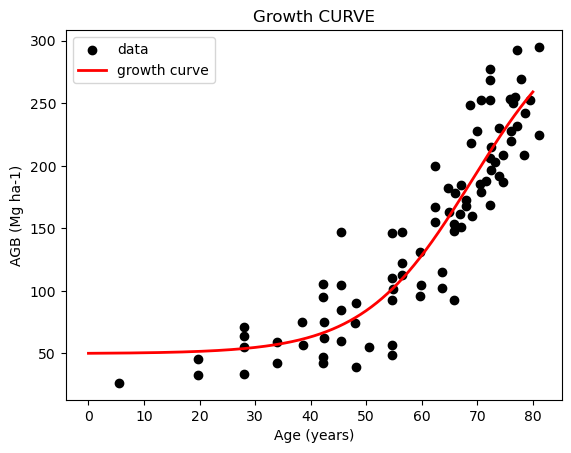

In [6]:
x_data = np.array([5.51, 19.77, 19.77, 28.07, 27.99, 28.07, 28.07, 33.95, 33.95, 38.63, 38.38, 42.17, 
           42.25, 42.33, 42.33, 45.39, 48.13, 50.55, 54.58, 54.66, 48.05, 48.13, 45.39, 42.25, 
           42.17, 45.39, 45.39, 54.58, 54.82, 54.66, 59.66, 59.90, 56.51, 56.51, 59.66, 54.66, 
           56.43, 63.60, 65.86, 63.60, 62.32, 62.40, 64.89, 62.44, 65.86, 66.99, 65.78, 66.91, 
           69.08, 67.88, 67.96, 66.02, 64.81, 66.99, 72.23, 70.70, 70.53, 71.62, 73.84, 74.56, 
           72.39, 68.92, 69.89, 68.76, 70.62, 72.23, 72.39, 72.23, 73.11, 74.64, 78.43, 81.09, 
           76.09, 76.09, 73.84, 77.22, 78.59, 76.50, 75.93, 76.74, 72.23, 72.35, 77.18, 77.91, 81.17, 79.56])

y_data = np.array([26.33, 45.28, 32.78, 33.19, 55.36, 64.23, 70.69, 59.39, 42.46, 56.98, 74.72, 42.46, 
          47.30, 62.22, 74.72, 60.20, 38.83, 55.36, 48.91, 56.57, 74.31, 90.04, 84.39, 94.88, 
           105.36, 104.96, 146.89, 110.20, 101.73, 92.46, 95.68, 104.96, 113.02, 121.89, 130.77, 
           146.49, 146.89, 102.14, 92.86, 115.04, 154.96, 167.06, 163.43, 199.92, 148.10, 151.33, 
           153.75, 161.41, 160.20, 167.86, 172.30, 177.94, 181.97, 184.39, 168.26, 179.15, 185.20, 
           188.02, 191.65, 186.81, 196.89, 217.86, 227.54, 248.91, 252.94, 252.94, 214.64, 206.17, 
           202.94, 208.59, 208.59, 224.31, 219.88, 227.94, 230.36, 231.97, 242.05, 250.12, 253.75, 
           254.96, 268.67, 277.74, 292.86, 269.07, 295.08, 252.94])

def sigmoidal_curve(x, a, b, c, d):
    return a / (1 + np.exp(-b*(x-c))) + d

params, params_covariance = curve_fit(sigmoidal_curve, x_data, y_data, p0=[50, 0.1, 30, 0])

x = np.linspace(0, 80, num=1000)
y = sigmoidal_curve(x, params[0], params[1], params[2], params[3])

plt.scatter(x_data, y_data, label='data', marker='o', c='black')
plt.plot(x, y, 'b-', label='growth curve', color='red', linewidth=2)

plt.title('Growth CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()